<a href="https://colab.research.google.com/github/santiagorivas0/Prediccion-de-Abandono-de-Clientes-Bancarios/blob/main/Deasfio_Evaluacion_ML_Santiago_Rivas_Santiago_Quinteros_Mulero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PREDICCIÓN DEL ABANDONO DE CLIENTES BANCARIOS**

In [2]:
#LIBRERIAS

#MANIPULACION DE DATOS, CALCULOS Y GRÁFICOS
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#WARNINGS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


**IMPORTAMOS LOS DATOS**

In [4]:
df = pd.read_csv('Abandono_Clientes_Bancarios.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**DATA WRANGLING** 

In [5]:
df1 = df.drop(["Surname", "CustomerId","Tenure","RowNumber"], axis=1)

In [6]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_geography = pd.get_dummies(df["Geography"], prefix="Geography")

In [7]:
df = pd.concat([df, dummy_gender, dummy_geography], axis=1)




**MODELOS PARA DISMINUIR DIMENSIONALIDAD Y AGRUPAR**

BASE PARA MODELIZAR

In [8]:
df3 = df[['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Male','Geography_France','Geography_Spain','Exited']]
df3.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Spain,Exited
0,619,42,0.00,1,1,1,101348.88,0,1,0,1
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,159660.80,3,1,0,113931.57,0,1,0,1
3,699,39,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
X = df3.drop('Exited', axis=1)
y = df3['Exited']


PCA

In [10]:
from sklearn.decomposition import PCA
#generacion PCA todas las variables
pca = PCA()
#trasnformacion
pcaData = pd.DataFrame(pca.fit_transform(df3))
#valores de lasvariables
pca.explained_variance_ratio_

array([5.41184038e-01, 4.58814649e-01, 1.29726454e-06, 1.52638012e-08,
       4.81161063e-11, 4.24773234e-11, 3.72008893e-11, 3.35597949e-11,
       2.88191911e-11, 1.87131787e-11, 9.97334933e-12])

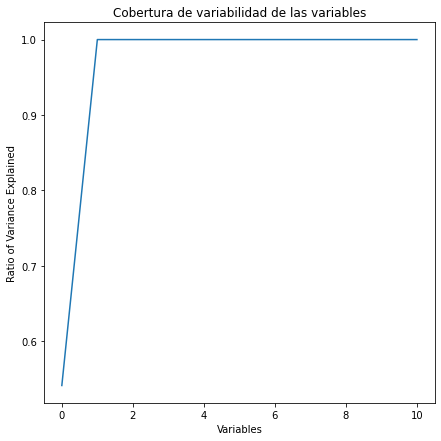

In [11]:
plt.rcParams['figure.figsize'] = 7, 7
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Variables')
plt.ylabel('Ratio of Variance Explained')
plt.title('Cobertura de variabilidad de las variables')
plt.show()

DADO EL GRAFICO NOS QUEDAMOS CON 2 COMPONENTES DEL PCA, QUE EXPLICAN LA VARIABILIDAD DE TODO LA BASE

In [ ]:
#Transformacion por la conclusion

pcaData.drop(columns = [5,6,7,8], inplace=True)
pcaData.head()

,0,1,2,3,4,9,10,11,12,13
0,-76157.145982,-7194.761640,30.782525,3.443065,-0.698970,0.608445,0.653103,-1.764679e-16,-9.035438e-16,-1.588643e-17
1,8266.910411,-11846.105623,42.570232,2.044641,1.187959,-0.272622,0.010867,-1.514783e-15,-1.270848e-15,4.859323e-18
2,83998.633338,-7340.133435,149.306016,2.634843,-0.789371,-0.385653,0.807870,4.364073e-17,4.263027e-16,-6.571254e-18
3,-76741.325978,304.770458,-49.200414,0.453769,-0.674007,-0.219697,-0.263746,1.676216e-16,-4.059011e-16,3.103242e-17
4,47245.526438,24749.993709,-198.940423,3.908362,1.116595,-0.446027,0.092329,-1.976043e-16,1.595997e-16,-2.494453e-16


In [ ]:
#genero el modelo PCa con n variables(2)
pca = PCA(n_components = 2)

#entreo y trasnformo
X_train = pca.fit_transform(X)

#explicacion de variabilidad de datos
pca.explained_variance_ratio_


array([0.54118404, 0.45881465])

ESTOS DOS COMPONENTES DEL PCA EXPLICAN LA VARIABILIDAD

**ANALISIS FACTORIAL**

In [ ]:
!pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal", 
                    is_corr_matrix=False)
fa.fit(X)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [ ]:
print("Valores propios:")
print(fa.get_eigenvalues()[0])
print()
print("Communalities:")
print(fa.get_communalities())
print()
print("Varianzas especificas:")
print(fa.get_uniquenesses())
print()
print("Cargas de los factores:")
print(fa.loadings_)

Valores propios:
[ 3.15650271e+00  2.00453305e+00  1.44762021e+00  1.09100553e+00
  1.01246367e+00  1.00179556e+00  9.90450483e-01  9.24017594e-01
  8.99458079e-01  4.72153096e-01  3.44659489e-16  0.00000000e+00
 -3.24098828e-17]

Communalities:
[1.62805454e-04 3.69630777e-03 7.36423586e-03 2.34327836e-03
 3.16314542e-04 1.76802425e-03 2.95390169e-04 9.97961695e-01
 9.97961695e-01 7.99419983e-01 7.99419983e-01 7.75163028e-01
 7.75163028e-01]

Varianzas especificas:
[0.99983719 0.99630369 0.99263576 0.99765672 0.99968369 0.99823198
 0.99970461 0.0020383  0.0020383  0.20058002 0.20058002 0.22483697
 0.22483697]

Cargas de los factores:
[[-0.01191531 -0.00456409]
 [-0.03573666 -0.04918535]
 [-0.08153515  0.02676296]
 [ 0.00290657 -0.04832008]
 [ 0.01451403  0.01027898]
 [-0.00968472  0.04091736]
 [ 0.00119631 -0.01714523]
 [ 0.04962792  0.99774684]
 [ 0.04962792  0.99774684]
 [ 0.89355125 -0.03140287]
 [ 0.89355125 -0.03140287]
 [-0.87790029  0.06673907]
 [-0.87790029  0.06673907]]


In [ ]:
pd.DataFrame(fa.loadings_ , columns = ['Componente 1', 'Componente 2'], index=X.columns)

,Componente 1,Componente 2
CreditScore,-0.011915,-0.004564
Age,-0.035737,-0.049185
Balance,-0.081535,0.026763
NumOfProducts,0.002907,-0.048320
HasCrCard,0.014514,0.010279
IsActiveMember,-0.009685,0.040917
EstimatedSalary,0.001196,-0.017145
Gender_Male,0.049628,0.997747
Gender_Male,0.049628,0.997747
Geography_France,0.893551,-0.031403


**ClUSTERS + ANALISIS DE COMPONENTES PRINCIPALES (USAMOS DATA TRANSFORMADA POR EL PCA DE DOS COMPONENTES)**

KMEANS

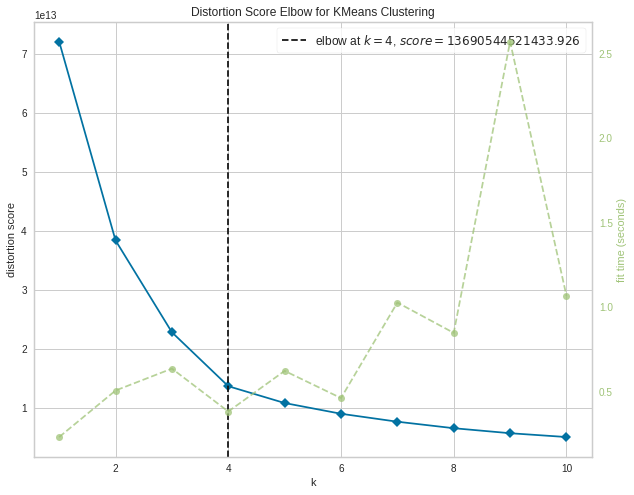

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#metodo del codo
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.rcParams['figure.figsize'] = 10, 8
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(pcaData)
visualizer.poof()

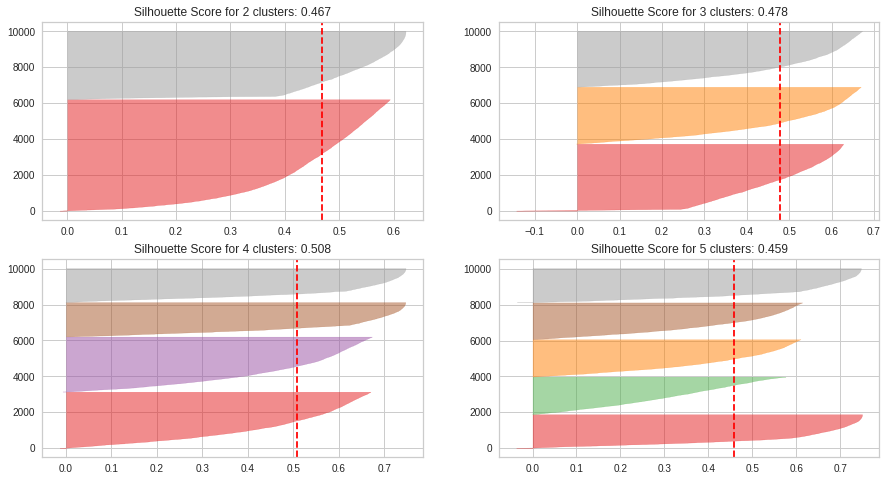

In [ ]:
# Silhouette Scores of PCA Data
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(pcaData)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(pcaData, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)


DADO EL GRAFICO CONSIDERAMOS MEJOR MODELIZACION 4 CLUSTERS

In [ ]:
#entrenamiento del model
modelKM = KMeans(n_clusters = 4)
modelKM.fit(pcaData)

#generacion del clusters
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : pcaPredKM.value_counts(), 
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
0   3132    31.32
2   3065    30.65
3   1914    19.14
1   1889    18.89


Hirarchical Clustering

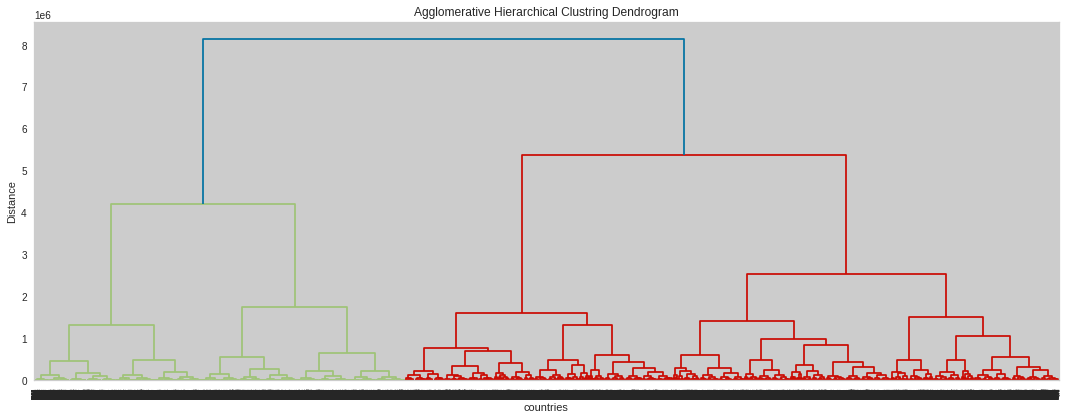

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

link = linkage(pcaData, metric = 'euclidean', method = 'ward')

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('countries')
plt.ylabel('Distance')
dendrogram(link)
plt.tight_layout()

In [ ]:
from sklearn.cluster import AgglomerativeClustering as agc

modelAGC = agc(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
modelAGC.fit(pcaData)
sPredAGC = pd.Series(modelAGC.labels_)
print(pd.concat({'count' : sPredAGC.value_counts(), 
                 'percent' : round(sPredAGC.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

   count  percent
0   3757    37.57
2   2621    26.21
1   1980    19.80
3   1642    16.42


### <u>Hirarchical Clustering Scores</u>:

In [ ]:
from sklearn.metrics import davies_bouldin_score
print('Silhouette Score:', '%.2f'%sil_score(pcaData, sPredAGC))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(pcaData, sPredAGC))

Silhouette Score: 0.47
Davies Bouldin Score: 0.67


### <u>KMeans Clustering Scores</u>:

In [ ]:
print('Silhouette Score:', '%.2f'%sil_score(pcaData, pcaPredKM))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(pcaData, pcaPredKM))

Silhouette Score: 0.51
Davies Bouldin Score: 0.64


Dadas las metricas nos quedamos con el KMeans + PCA